In [1]:
def generate_matrix_dft(N, K):
    import numpy as np
    """Generate a DFT (discete Fourier transfrom) matrix
    Args:
        N: Number of samples
        K: Number of frequency bins
    Returns:
        dft: The DFT matrix
    """
    dft = np.zeros((K, N), dtype=np.complex128)
    for n in range(N):
        for k in range(K):
            dft[k, n] = np.exp(-2j * np.pi * k * n / N)
    return dft

N = 32
dft_mat = generate_matrix_dft(N, N)

def my_DFT(x):
    """Compute the discete Fourier transfrom (DFT)
    Args:
        x: Signal to be transformed
    Returns:
        X: Fourier transform of `x`
    """
    x = x.astype(np.complex128)
    N = len(x)
    dft_mat = generate_matrix_dft(N, N)
    return np.dot(dft_mat, x)

In [2]:
def genComplexSine(k, N):

    import numpy as np
    int(N) if N >= 1 else False
    int(k) if 0 < k < (N - 1) else False
    n = np.arange(0,N)
    
    cSine = np.exp(-1j * 2 * np.pi * k * n / N)
    return cSine

# DFT review

In [3]:
from IPython.display import Math
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline 
#import mpld3 
#mpld3.enable_notebook() 

$\renewcommand{\vec}[1]{\mathbf{#1}}$

The DFT can be understood as the projection of a signal into a finite set of complex sine waves. It is able to figure out how much of each sinusoid is present in the signal. (Where each sinusoid has a period equal to k over N samples.)

### First, some linear algebra:

Before we get into the Fourier transform properly, let's switch gears for a bit and work with points in the 2-dimensional plane. 
Consider the vector $\vec{v} = (3, 4)$.

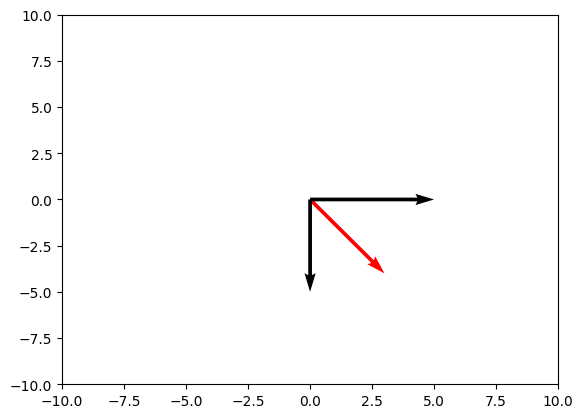

In [4]:
plt.quiver([0, 0, 0], [0, 0, 0], [3, 5*1, 0], [-4, 0, 5*-1], angles='xy', scale_units='xy', scale=1, color=['r', 'black', 'black'])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show();

We can represent this vector as a linear combination of unit vectors $\hat{x} = (1,0)$ and $\hat{y} = (0,1)$

$$\vec{v} = A\hat{x} + B\hat{y}$$

To find $A$ and $B$, we simply take the dot product of $\vec{v}$ with $\hat{x}$ and $\hat{y}$ respectively.

$$A = \vec{v} \cdot \hat{x} = 3\cdot1 + 4\cdot0 = 3$$
$$B = \vec{v} \cdot \hat{y} = 3\cdot0 + 4\cdot1 = 4$$

Or, to put it another way

$$\vec{v} = \sum_{n=0}^{N} (\vec{v} \cdot \hat{x}_n)\hat{x}_n$$

This example is painfully trivial, but let's now consider an alternate coordinate system in which $\hat{x}' = \left(\frac{\sqrt{3}}{2}, \frac{1}{2}\right)$ and $\hat{y}' = \left(\frac{-1}{2}, \frac{\sqrt{3}}{2}\right)$

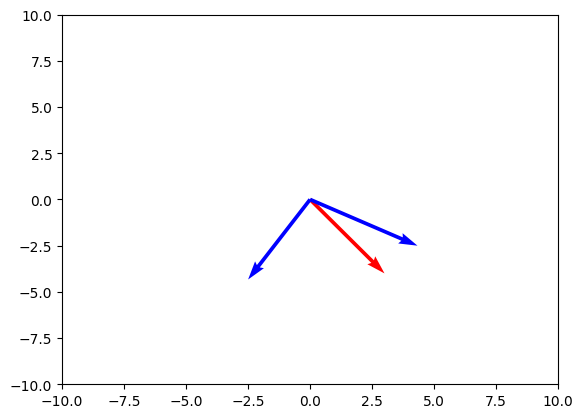

In [5]:
plt.quiver([0, 0, 0], [0, 0, 0], [3, 5*np.sqrt(3)/2, 5*-1/2], [-4, 5*-1/2, 5*-np.sqrt(3)/2], angles='xy', scale_units='xy', scale=1, color=['r', 'b', 'b'])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

To represent $\vec{v}$ in this new coordinate system, ($\vec{v}'$), we replace $\hat{x}_n$ with $\hat{x}_n'$ in the previous equation.

$$\vec{v}' = \sum_{n=0}^{N} (\vec{v} \cdot \hat{x}_n')\hat{x}'_n$$

$$ = (3, 4) \cdot \left(\frac{\sqrt{3}}{2}, \frac{1}{2}\right) \hat{x}' + (3, 4) \cdot \left(\frac{-1}{2}, \frac{\sqrt{3}}{2}\right) \hat{y}'$$
$$ = \left(3 \cdot \frac{\sqrt{3}}{2} + 4 \cdot \frac{1}{2}\right)\hat{x}' + \left(3 \cdot \frac{-1}{2} + 4 \cdot
\frac{\sqrt{3}}{2}\right)\hat{y}'$$
$$ $$
$$ = \left(\frac{3\sqrt{3} + 4}{2}, \frac{4\sqrt{3} - 3}{2}\right)$$

Note that our old unit vectors can be written in the new coordinate system as follows:

$$\hat{x} = \frac{\sqrt{3}}{2}\hat{x}' - \frac{1}{2}\hat{y}'$$
$$$$
$$\hat{y} = \frac{1}{2}\hat{x}' + \frac{\sqrt{3}}{2}\hat{y}'$$

And we can get $\vec{v}$ back with same formula that we used to derive $\vec{v}'$:

$$\vec{v} = \sum_{n=0}^{N} (\vec{v}' \cdot \hat{x}_n)\hat{x}_n$$
$$ = \left(\frac{3\sqrt{3} + 4}{2}, \frac{4\sqrt{3} - 3}{2}\right) \cdot \left(\frac{\sqrt{3}}{2}, -\frac{1}{2}\right) \hat{x} + \left(\frac{3\sqrt{3} + 4}{2}, \frac{4\sqrt{3} - 3}{2}\right) \cdot \left(\frac{1}{2}, \frac{\sqrt{3}}{2}\right) \hat{y}'$$
$$ = \left(3, 4\right)$$

### So why go through all of that nonsense?

 - $\hat{x}$ and $\hat{y}$ form an __orthonormal basis__ of the 2D plane, as do $\hat{x}'$ and $\hat{y}'$
     - __Basis:__ a set of elements within a vector space such that __*any*__ other vector within the space can be represented as a linear combination of elements within the basis
         - $A\hat{x} + B\hat{y}$
     - __Orthogonal:__ Dot product of different elements is $0$.
     - __Normal:__ Dot product of an element with itself is $1$.
 - You can move from one coordinate system to another without any loss of information.
 - There is a beautiful symmetry to this process.
$$\vec{v}' = \sum_{n=0}^{N} (\vec{v} \cdot \hat{x}_n')\hat{x}'_n  \Rightarrow \vec{v}' = X\vec{v}$$
$$\vec{v} = \sum_{n=0}^{N} (\vec{v}' \cdot \hat{x}_n)\hat{x}_n \Rightarrow \vec{v} = X^{-1}\vec{v}'$$

Where $X = \begin{pmatrix}\frac{\sqrt{3}}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{\sqrt{3}}{2}\end{pmatrix}$, a matrix with our primed basis vectors as columns. 

### The DFT equation is shown below:

$$X[k] = \sum_{n=0}^{N-1} x(n) \cdot e^{-j 2\pi k n/N} , k = 0, ..., N-1$$

Or, you may have seen the exponent written like this:

$$e^{-j \omega t}$$

$$X[k] = \sum_{n=0}^{N-1} x(n) \cdot e^{-j 2\pi k n/N} , k = 0, ..., N-1$$

Where:  
$n$ = discrete time index<br>
$k$ = discrete frequency index<br>
$N$ = total number of samples<br>
$\omega_{k}$ = $2\pi k/N$ = frequency in radians

This equation is at the heart of all signal processing theory.

__Key Insight:__ $e^{j 2\pi k n/N}; k = 0, ..., N-1$ is an orthonormal basis for periodic signals.
 - For non-periodic signals, allow k to be continuous.
 
The Fourier transform is shifting our original signal into a new coordinate system.

### Sidebar: This has MASSIVELY important in several areas of science

The Fourier transform is used extensively in any branch of science or engineering involving systems whose rate of change, i.e. their derivative, is a function of their current value. These include things like:
 - The population of organisms in an ecosystem.
 - The value of a stock.
 - The infection rate of a deadly disease.

This is because differention in the time domain is equivalent to multiplying by $j\omega$ in the frequency domain.

$$X[k] = \sum_{n=0}^{N-1} x(n) \cdot e^{-j 2\pi k n/N} k = 0, ..., N-1$$

$x[n]$ is the input signal, where sample by sample is multiplied by a complex sinusoid at each value of k, then we sum over N (the number of samples), and as a result we obtain the spectrum (a vector).

The spectrum obtained by the DFT returns a complex function that can be expressed with a magnitude and a phase. In the magnitude spectrum, we identify the frequency content of the signal. And in the phase spectrum, we see how the sinusoids are placed within the cycle length in radians with respect to time = zero.

Recall that using Euler's formula we can translate the complex exponential into the cosine (real) and sine (imaginary) parts of the same frequency:

$$e^{-j 2\pi k n/N} = \cos(2\pi k n/N) - j\sin(2\pi k n/N)$$

### Complex Numbers
The equation above is the "meat and potatoes" of the DFT. It is built on Euler's identity:

$e ^{j\pi} +1 =0$

which is famous for bringing together the five most important numbers in mathematics.

A complex number is any number with a real and an imaginary component. The complex number can be written as $a+jb$ where $j$ (or $i$) is the imaginary unit.

Knowing how to manipulate these complex numbers is therefore useful.

$a$ is called the `real` part of the number and $b$ is called the `imaginary` part of the number

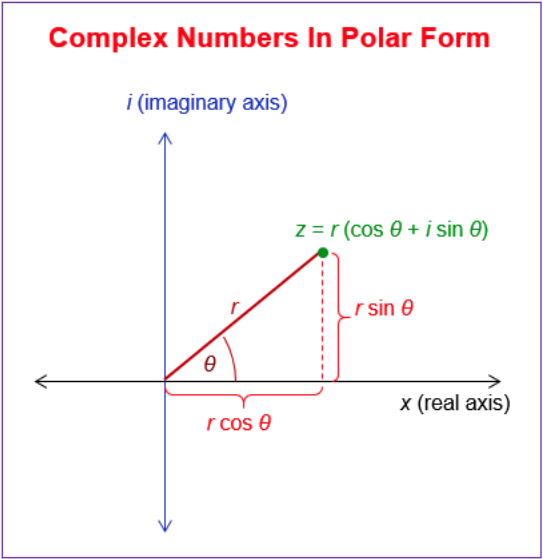

In [6]:
from IPython.display import Image
Image('../images/polarRectangular.png',width=400)

#### Rectangular to polar form of complex numbers

So we can express a point in a complex plane (i.e., a sample) in three ways:

$Z = a + jb$

or

$Z = r \angle \theta$

or

$Z = r(cos\ \theta + j\ sin\ \theta)$

conversion reminders:
To convert between these forms, the following are helpful reminders:

$sin\theta = \frac{b}{r}$

$cos\theta = \frac{a}{r}$

$r = \sqrt{a^2 + b^2} $

$\theta = arctan(\frac{b}{a})$

Or, to convert from polar to rectangular:

$a = r\ cos\theta$

$b = r\ sin\theta$

The absolute value of $Z$ is equal to $\sqrt{a^2 + b^2}$ which represents the length of the radius. This translates to the magnitude (or amplitude) of the sinusoidal component

The argument of Z is equal to $arctan(\frac{b}{a})$ which represents the phase of the component

And recall that there is nothing "imaginary" about $j$, it is simply a number whose square equals one: 

$j = \sqrt{-1}$

## Back to DFT...

If we want to perform a DFT on a signal of size N = 4, we will have 4 samples (n=0,1,2,3) and therefore 4 frequency bins (k=0,1,2,3) as output of the DFT. If we model this output for some sample, s, of length 4, we can see the signal will be projected to these four sine waves.

$s_0 = \cos(2\pi * 0 * n/4) - j\sin(2\pi * 0 * n/4) = [1,1,1,1]$  
$s_1 = \cos(2\pi * 1 * n/4) - j\sin(2\pi * 1 * n/4) = [1,-j,-1,j]$  
$s_2 = \cos(2\pi * 2 * n/4) - j\sin(2\pi * 2 * n/4) = [1,-1,1,-1]$  
$s_3 = \cos(2\pi * 3 * n/4) - j\sin(2\pi * 3 * n/4) = [1,j,-1,-j]$

If we create a concrete example where x[n] = [1,-1,1,-1] and compute the **scalar product** (or **dot product** e.g., multiply the signal by each basis function and sum):

In [7]:
import numpy as np
sig=np.array([1,-1,1,-1]) #create example signal
X_k = np.array([])

for k in range(4): 
    n_k = np.array([])
    for n in range(4):
        s_i = np.cos(2*np.pi*k*(n/4)) - 1j*(np.sin(2*np.pi*k*(n/4))) #create each sample of each basis function at all values of k
        print('n=',n,s_i)
        n_k = np.append(n_k, s_i)
    print('k equals',k,':',n_k)
    sc_prod = sum(n_k*sig) #compute scalar product of signal and basis function
    #there is also a numpy function for this: 
    #sc_prod = np.dot(n_k,sig)
    X_k=np.append(X_k,sc_prod)

np.round(np.abs(X_k),1) # all of signal projects onto k = 2

n= 0 (1+0j)
n= 1 (1+0j)
n= 2 (1+0j)
n= 3 (1+0j)
k equals 0 : [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
n= 0 (1+0j)
n= 1 (6.123233995736766e-17-1j)
n= 2 (-1-1.2246467991473532e-16j)
n= 3 (-1.8369701987210297e-16+1j)
k equals 1 : [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
 -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
n= 0 (1+0j)
n= 1 (-1-1.2246467991473532e-16j)
n= 2 (1+2.4492935982947064e-16j)
n= 3 (-1-3.6739403974420594e-16j)
k equals 2 : [ 1.+0.0000000e+00j -1.-1.2246468e-16j  1.+2.4492936e-16j
 -1.-3.6739404e-16j]
n= 0 (1+0j)
n= 1 (-1.8369701987210297e-16+1j)
n= 2 (-1-3.6739403974420594e-16j)
n= 3 (5.51091059616309e-16-1j)
k equals 3 : [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16+1.0000000e+00j
 -1.0000000e+00-3.6739404e-16j  5.5109106e-16-1.0000000e+00j]


array([0., 0., 4., 0.])

The absolute value of the scalar product may be interpreted as a measure of similarity between two vectors $x$ and $y$: if $x$ and $y$ point to the same direction (i.e., they are similar), the scalar product $|⟨𝑥|𝑦⟩|$ is large. If $x$ and $y$ are orthogonal (i.e., they are dissimilar), the inner product $|⟨𝑥|𝑦⟩|$ is zero.

Note: k is an index of a frequency bin. It is a frequency normalized over N (i.e., the total number of samples used in the transformation), while f usualy denotes frequency in Hz. It's basically the same thing in different units. "k" is the number of periods in the N samples, "f" is the number of periods in a single second (or, usually, in 44,100 samples).

So, in other words, we essentially extract the energy under each of these frequency "bins", or k periods inside the N samples. Think of the above as four "filters" to measure each possible "sinusoidal ingredient."

Let's look at a basic example. We'll generate a complex sinusoid of length 64 and k = 7. So this means we will have seven cycles over the time period of length N (64).

In [8]:
N = 64
k0 = 7 
n = np.arange(0,N)
s = np.exp(1j * 2 * np.pi * k0 * n / N) # this is our complex sinusoidal signal of N=64 and k=7

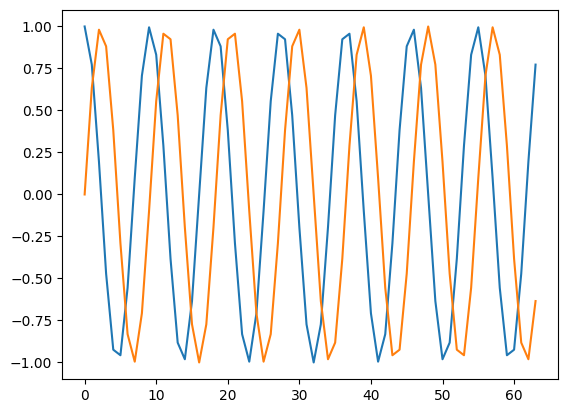

In [9]:
plt.plot(n, np.real(s), n, np.imag(s)) # here we can see it plotted to make sure it looks right.

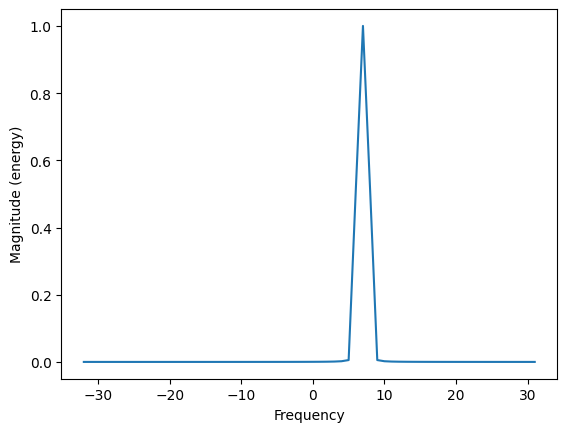

In [10]:
plt.magnitude_spectrum(s, N); #recall pyplot's "magnitude_spectrum" plotting function

Obviously, this is very perfect. It means that the entire signal projects onto one single basis function of the DFT (k = 7). This never happens when dealing with "real world" signals.

Let's figure out how to compose our DFT algorithm ourselves and demonstrate first with a complex sinusoid.

In [11]:
#First, create input signal, "s" with same properties as before
N = 64
k0 = 7 
n = np.arange(0,N)
s = np.exp(1j * 2 * np.pi * k0 * n / N) #create complex signal

X = np.array([]) #create empty array
#iterate over all sample indices:
for k in range(N):
    xp = np.exp(-1j * 2 * np.pi * k * n / N) #create complex exponential (i.e., frequency) at every k
    X = np.append(X, sum(s*xp))

To have a slightly more intuitive understanding of what's happening here, we can plot each `xp` against the signal, and we can show a 'dot' for the value of the dot product:

/Users/jiayingli/miniforge3/envs/AudioTechII/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


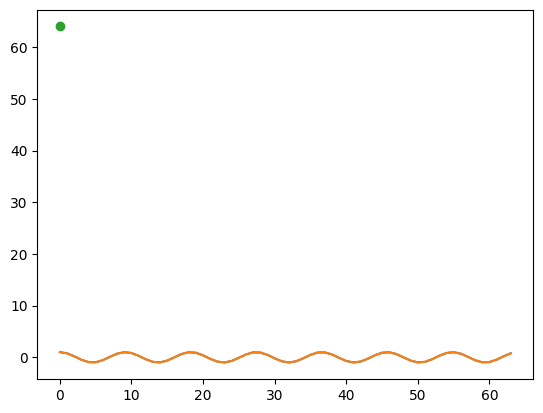

In [12]:
plt.plot(s.real)
xp = np.exp(-1j * 2 * np.pi * 7 * n / N)#manually change values of k
plt.plot(xp.real)
plt.plot(sum(s*xp), marker='o')

"X" is the output of the DFT which is a complex vector of the magnitude and phase of each component k in the signal
X.
Recall that it had a periodicity equal to 7:

Text(0, 0.5, 'magnitude')

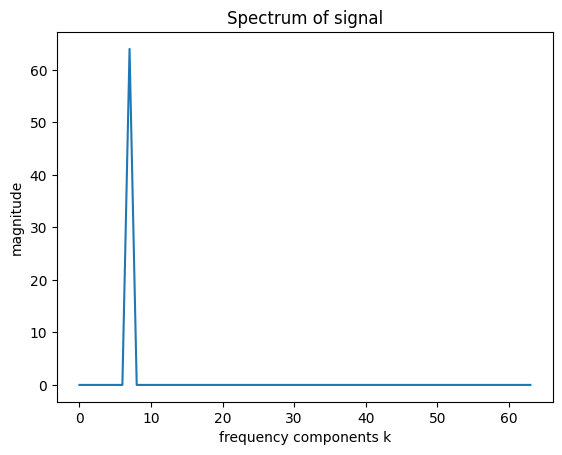

In [13]:
plt.plot(X)
plt.title('Spectrum of signal')
plt.xlabel('frequency components k')
plt.ylabel('magnitude')

Recall that magnitude spectrum for a complex sinusoid will have a single value, whereas a real sinusoid will have two (one positive, one negative around center at 0)

Let's demonstrate how this works with a real sinusoid. Recall that a real sinusoid will have *two* complex exponential results (the sum of two complex exponentials), so our DFT output will show two peaks. 

$$\cos(\omega t) = \frac{1}{2}(e^{j \omega t} + e^{-j \omega t})$$

(Where the first exponential represents a counter-clockwise rotating sinusoid and the second is a clockwise rotating sinusoid.)

We'll create a real-valued signal with the same properties as before:

In [14]:
N=64
k0 = 7
n = np.arange(N)
# s is real not complex:
s = np.cos(2* np.pi * k0 * n/N)# create a REAL signal at k0 = 7

X = np.array([]) #create empty array
#iterate over all sample indices:
for k in range(N):
    xp = np.exp(-1j * 2 * np.pi * k * n / N) #create complex exponential (i.e., frequency) at every k
    X = np.append(X, sum(s*xp))


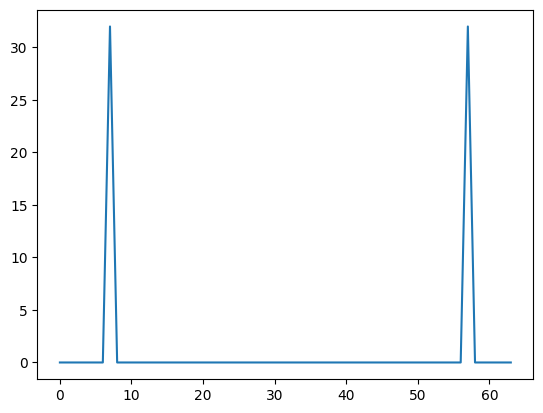

In [15]:
plt.plot(np.abs(X))

However, these values are misleading - they are plotted with regards to the values of x which are index values from 0 to 64. Because it *should represent* a symmetrical output around zero, we need to change how we calculate N. So instead of 0 : 64, we divide N by two and show from -N/2 to positive N/2. (Since we want to calculate and display the correct values of 7 and -7).

In fact, when working with real signals what's better is to create a different set of incides for the frequency and samples, that actually run from -N/2 to N/2 just to keep everything clear and tidy.

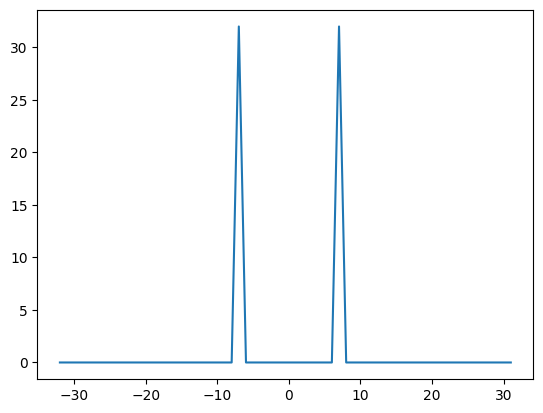

In [16]:
N=64
k0 = 7
s = np.cos(2* np.pi * k0/N * np.arange(N))#notice we subbed cos for exp and got rid of j

#REDO with altered indices:
nv = np.arange(N) # indices for samples
kv = np.arange(-N/2, N/2) # indices for frequency

X = np.array([]) #create empty array
#iterate over all sample indices and create complex exponential (i.e., frequency) at every k
for k in kv:
    xp = np.exp(-1j * 2 * np.pi * k * nv / N) 
    X = np.append(X, sum(s*xp))
    
plt.plot(kv, abs(X))

## Properties of DFT

Since the resolution of k depends on the number of samples N, we will obtain a more dense sampling along the frequency axis if we have longer samples (up to a point). Therefore, a larger value of N is expected to produce a finer representation of the signal in the frequency domain, (i.e. a better *frequency resolution*.)

However, this increasing frequency resolution is valid, **only as long as the signal remains stationary**, (i.e. as long as its properties do not change over time). When the signal changes over time, this DFT cannot be performed over the entire signal, we instead need to "cut up" the signal into fragments of time that are as unchanging as possible and compute the DFT over each one.

(More on this next time.)

## IDFT
One of the nice things about the DFT is that it is recomposable (or invertible). That is, we can get back the original signal from its spectrum. So it's a kind of synthesis, because we are recreating a whole out of many parts.

In order to run the inverse DFT, we take $x[k]$, which is now our input vector of length N, (i.e., the resulting spectrum of a DFT), and we output a set of samples--also of length N--which represent our original signal. 

The formula for the IDFT is very similar. 

As a review:

$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j 2\pi k n/N} , n = 0,...,N-1$$

...where the weight of each complex exponential is equal to the kth DFT coefficient. Said another way, 
X[k] can be understood as a measure of the intensity with which the respective frequency participates in
the signal x(n).

By summing these sinusoids, we are effectively performing the same synthesis activity we did earlier in the semester.

So now we iterate over every n (instead of k). Our output, "X" is the series of sums of all frequencies (k) over all possible samples:

In [17]:
# 'X' was the variable of the stored output of the DFT

N = 64
nv = np.arange(N) # indices for samples
kv = np.arange(-N/2, N/2) # indices for frequency

y = np.array([])
#recall capital 'X' above is our output from the DFT (or spectrum values)
#now iterate over n
for n in nv: 
    xp = np.exp(1j * 2 * np.pi * kv * n / N) #create complex exp at every n
    y = np.append(y, 1.0/N * sum(X*xp)) #note the factor of 1/N to normalize

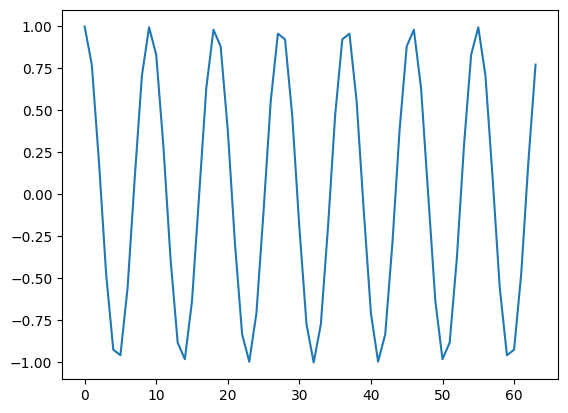

In [18]:
plt.plot(nv, y)

### Converting between time and spectral representations

The advantage of representing a sound in terms of its Fourier series is that it allows us to manipulate the frequency content directly. If we want to accentuate the high-frequency effects in a sound (make a sound brighter -- more on this later), we could just make all the high-frequency Fourier coefficients bigger in amplitude. If we wanted to turn a sawtooth wave into a square wave, we could just set to zero the Fourier coefficients of the even partials.

### Example: controlling frequency content

In [19]:
# N = 64
# k0 = 7 
# n = np.arange(0,N)

N=1000
f0=400
n = np.arange(N)
sig = np.cos(2 * np.pi * f0 * n/N)
hum = np.cos(2 * np.pi * 80 * n/N)
com = sig + hum

In [20]:
from IPython.display import Audio
Audio(sig, rate=1000)

In [21]:
Audio(com, rate=1000)

Text(0.5, 1.0, 'resulting signal with noise')

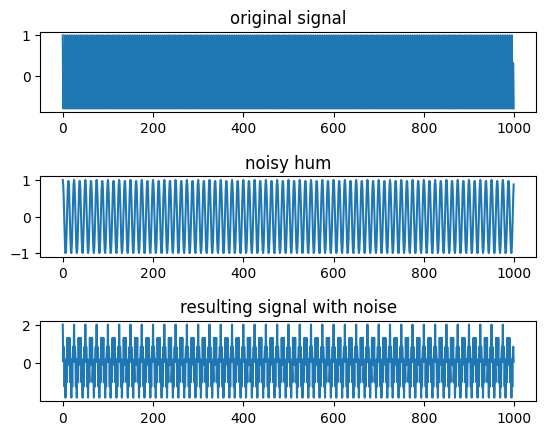

In [22]:
plt.subplot(3,1,1)
plt.subplots_adjust(hspace=.8)
plt.plot(sig[:1000])
plt.title('original signal')
plt.subplot(3,1,2)
plt.plot(hum[:1000])
plt.title('noisy hum')
plt.subplot(3,1,3)
plt.plot(com[:1000])
plt.title('resulting signal with noise')

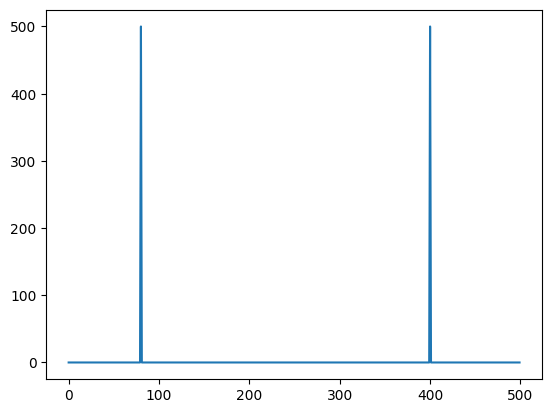

In [23]:
#my_DFT is simply a DFT function I wrote myself. You will all write your own
N = com.size//2
N
test = my_DFT(com)
plt.plot(np.abs(test)[:N])

In [24]:
np.abs(test[test > 1])

array([500., 500., 500., 500.])

In [25]:
#Create a filter by changing particular values to zero
#Remember that in a real signal all values in second half are mirror of first half.
copy = test.copy()
copy[80] = copy[80]*0
copy[-80] = copy[-80]*0

In [26]:
copy[abs(copy) > 1]

array([500.-5.84889139e-13j, 500.+4.77280224e-11j])

(0.0, 500.0)

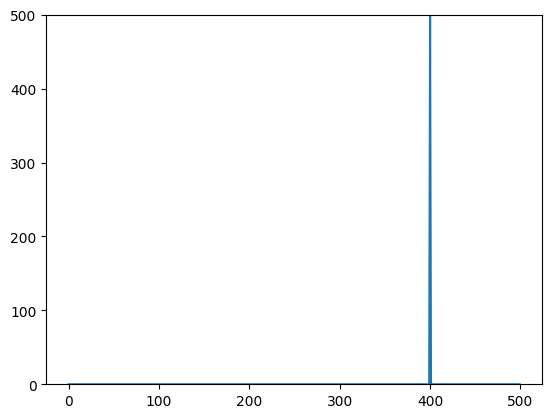

In [27]:
plt.plot(copy[:N])
plt.ylim(0,500)

we can now use the iDFT to recreate the signal without the noise

In [28]:
N = len(copy)

kv = np.arange(0, N)
nv = np.arange(0, N)

y = np.array([])
#recall that the variable "copy" is our output from the DFT (or spectrum values)
for n in nv: 
    s = np.exp(1j * 2 * np.pi * kv * n / N) 
    y = np.append(y, 1.0/N * sum(copy*s)) #1/N to normalize

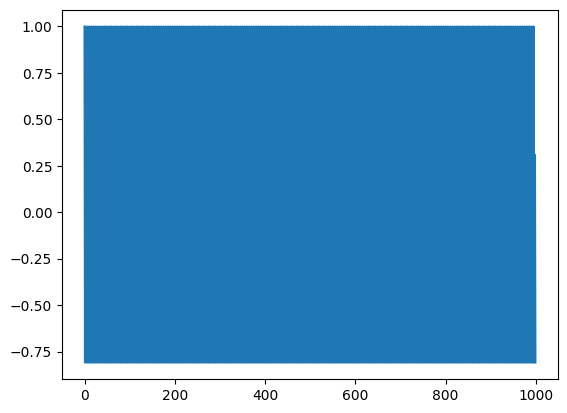

In [29]:
plt.plot(y.real)

In [30]:
Audio(y.real, rate=1000)

Note that the DFT will look very different for signals that are not perfect sinusoids:

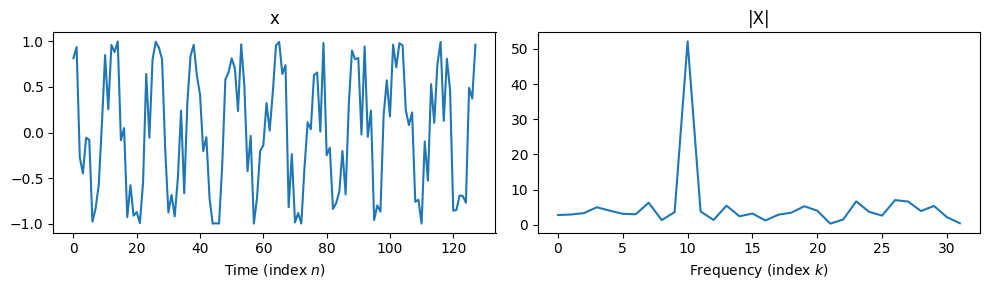

In [31]:
N = 128
n = np.arange(N)
k = 10
x = np.cos(2 * np.pi * (k * n / N) + 2 * (np.random.rand(N) - 0.5)) 
X = my_DFT(x)

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('x')
plt.plot(x)
plt.xlabel('Time (index $n$)')

plt.subplot(1, 2, 2)
plt.title('|X|')
plt.plot(np.arange(32),np.abs(X[:32])) # since the first half of the spectrum is all we need, it's common to ignore the second half
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()